In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json

# 1. Optimal model size
Now fitting the scaling laws for optimal model size from compute budget.

In [2]:
with open("data/isoflops_curves.json") as f:
    y = json.load(f)

In [3]:
min_loss = {}
min_loss_pair = {}
for test in y:
    if test["compute_budget"] not in min_loss or test["final_loss"] < min_loss[test["compute_budget"]]:
        min_loss[test["compute_budget"]] = test["final_loss"]
        min_loss_pair[test["compute_budget"]] = test["parameters"]

In [4]:
C = []
N = []
for c, n in sorted(min_loss_pair.items()):
    print(c, n, c/(6*n)/n)
    C.append(c)
    N.append(n)

6e+18 762093419 1.7218034645274298
1e+19 806647749 2.561420595303711
3e+19 1536852354 2.1169261660709755
6e+19 1952041776 2.624350178083856
1e+20 3253402960 1.5746101068503133
3e+20 5903836027 1.4345028999495435
6e+20 6971055968 2.0577985692201377
1e+21 6859328563 3.542301616712086
3e+21 12148905329 3.3876279602099935


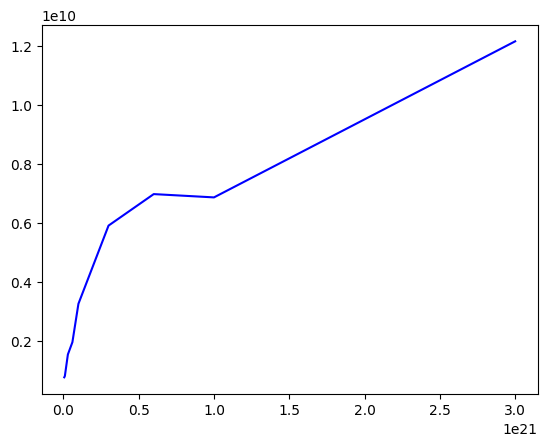

In [5]:
plt.plot(C, N, 'b-', label='data')

In [6]:
def func_N_C(x, a, b, c):
    return a * (x ** b) + c
popt, pcov = curve_fit(func_N_C, C, N, maxfev=5000)
popt

array([ 1.35024658e+03,  3.25313449e-01, -1.19220472e+09])

In [7]:
points = C  + np.linspace(4e+21, 1.1e+24, 20).tolist()

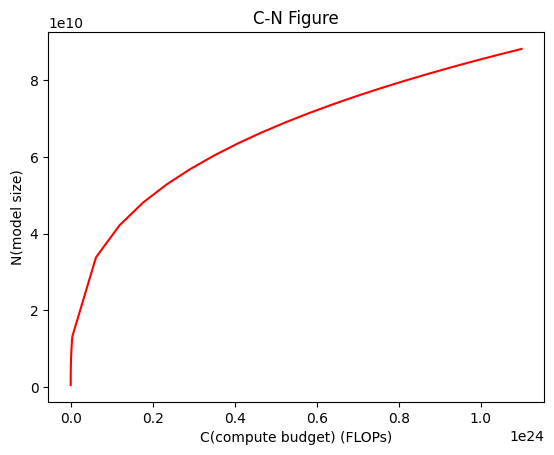

In [25]:
plt.plot(points, func_N_C(points, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('C(compute budget) (FLOPs)')
plt.ylabel('N(model size)')
plt.title('C-N Figure')
plt.savefig('writeup/C_N.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [28]:
int(func_N_C(1e24, *popt))

85491178611

In [30]:
int(func_N_C(1e23, *popt))

39792556129

# 2. Optimal dataset size
Now fitting the scaling laws for optimal dataset size from compute budget.

In [34]:
C = []
D = []
for c, n in sorted(min_loss_pair.items()):
    print(c, n, c/(6*n)/n)
    C.append(c)
    D.append(c/(6*n))

6e+18 762093419 1.7218034645274298
1e+19 806647749 2.561420595303711
3e+19 1536852354 2.1169261660709755
6e+19 1952041776 2.624350178083856
1e+20 3253402960 1.5746101068503133
3e+20 5903836027 1.4345028999495435
6e+20 6971055968 2.0577985692201377
1e+21 6859328563 3.542301616712086
3e+21 12148905329 3.3876279602099935


In [35]:
def func_N_D(x, a, b, c):
    return a * (x ** b) + c
popt, pcov = curve_fit(func_N_D, C, D, maxfev=5000)
popt

array([1.80243969e-03, 6.21977439e-01, 5.94777451e+08])

In [36]:
points = C  + np.linspace(4e+21, 1.1e+24, 20).tolist()

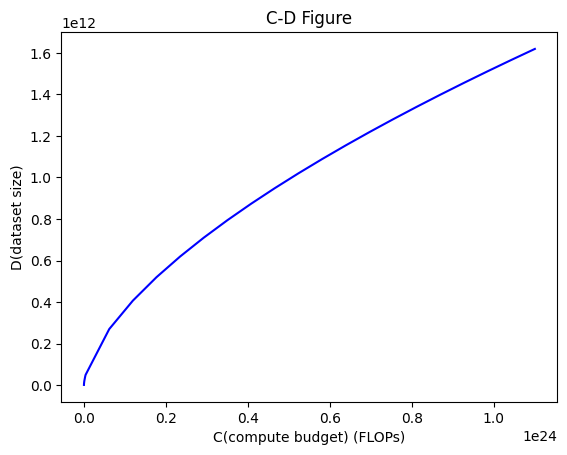

In [37]:
plt.plot(points, func_N_D(points, *popt), 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('C(compute budget) (FLOPs)')
plt.ylabel('D(dataset size)')
plt.title('C-D Figure')
plt.savefig('writeup/C_D.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [38]:
print(int(func_N_C(1e24, *popt)), int(func_N_C(1e23, *popt)))

1525768382027 364796370806
